In [16]:
import os
import sys
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_multiotsu
import utilities as utl 

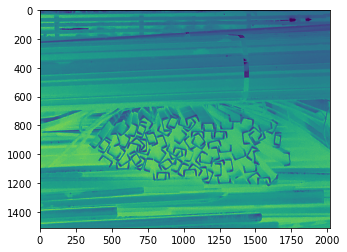

In [17]:
image = cv2.imread("./data/3.jpeg",0)
plt.imshow(image*255)
# plt.close()

In [18]:
# cv2.imwrite(f"./test_results/multiply_by_255.png", image*255)

In [19]:
# cv2.threshold(image, 127, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU);
# plt.imshow(image)

(651, 1511) (1512, 2016)


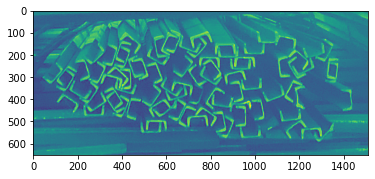

In [20]:
mask_pts = [[310,630], [1810,630], [1810,1280], [300,1280]]

croped, original = utl.crop(image, mask_pts)
plt.imshow(croped)

[  0   0   0 ... 255 255 255]


True

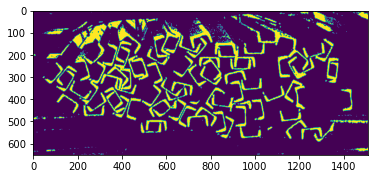

In [21]:
  # converting to its binary form
bw = cv2.threshold(croped, 170, 255, cv2.THRESH_BINARY)
print(bw[1][0])
plt.imshow(bw[1])
cv2.imwrite(f'./test_results/test_bw.png', bw[1])

(106, 56) (651, 1511)
shape: (651, 1511)


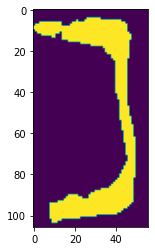

In [22]:
mask_pts1 = [[1390,350], [1445,350], [1445,455], [1390,455]]

croped1, original1 = utl.crop(bw[1], mask_pts1)
print("shape:", croped.shape)
plt.imshow( croped1)

In [23]:
kernel_shape = (60,60)

In [24]:
from array import array
from ctypes.wintypes import POINT


def find_angle_ninty(img):
    tr = 0.6
    x_ = []
    y_ = []
    array=np.array(img.shape)
    for i in range(img.shape[0]):
        cnt_x = 0
        for j in range(img.shape[1]):
            if img[i][j] > 0:
                cnt_x +=1
        if cnt_x > img.shape[1]*tr:
            # print(cnt_x, img.shape[1]*tr) 
            x_.append(i)
    for i in range(img.shape[1]):
        cnt_y = 0
        for j in range(img.shape[0]):
            if img[j][i] > 0:
                cnt_y +=1
        if cnt_y > img.shape[0]*tr:
            # print(cnt_x, img.shape[0]*tr) 
            y_.append(i)

    # start_point = 
    # cv2.line(image, start_point, end_point, color, thickness)
    return x_,y_

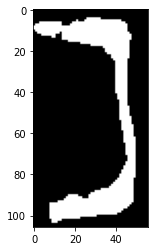

In [25]:
Y,X = find_angle_ninty(croped1)
cl_croped= cv2.cvtColor(croped1, cv2.COLOR_GRAY2BGR);
plt.imshow(cl_croped)

x:  42 [42, 43, 44, 45]
x:  6 [6, 7, 8, 9, 10, 11, 12, 13, 14, 92, 93, 94, 95, 96, 97, 98]
x:  93 [93, 94, 95, 96, 97, 98]
[(42, 45)] [(93, 98), (6, 14)]
106


True

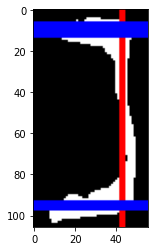

In [26]:
x_points = []
utl.find_points(X,x_points)
y_points = []
utl.find_points(Y,y_points)
print(x_points,y_points)
print(croped1.shape[0])
for z in x_points:
    for x in range(z[0],z[1]):
        cv2.line(cl_croped, [x,0], [x,croped1.shape[0]], (255,0,0), 1) 
for z in y_points:
    for x in range(z[0],z[1]):
        cv2.line(cl_croped, [0,x], [croped1.shape[0],x], (0,0,255), 1) 
plt.imshow(cl_croped)
cv2.imwrite(f'./test_results/test_rectangle.png', cl_croped)

In [27]:
a=[[[1],[2]],[[2],[3]]]
a=np.array(a)
a.shape
a[1][1]

array([3])

In [28]:
b=np.ones(a.shape)
b

array([[[1.],
        [1.]],

       [[1.],
        [1.]]])

In [29]:
a=[1,2,3]
a.append(None)
a

[1, 2, 3, None]

In [30]:
a = [6, 7, 8, 9, 10, 11, 12, 93, 94, 95, 96]
b=a[6:]
b

[12, 93, 94, 95, 96]